# 4 確率と統計の基礎

＜章トビラ＞
4章では、確率と統計を使った考え方と計算テクニックを身に付けていきましょう。4章では、確率と統計について、数式も含めて解説してきますので、数学的なバッググラウンドがない方にとっては難しいかもしれません。その場合は、それぞれの基本的な概念と計算方法の特徴をざっくりと把握しておくようにしてください。

世の中の様々な現象は確率的に生じていると仮定することで、それらの現象を数式的に表現することができます。具体的には、確率変数や確率分布、そして、確率論の3種の神器といわれる大数（たいすう）の法則と中心極限定理について学びます。ちなみに、3つ目は大偏差原理といって、確率的に起こりにくい非常にまれなケースを扱ったり、偏差が大きい部分の挙動を表すための原理ですが、本書の範囲を大きく超えるため、割愛します。他、統計的推定や検定についても学びます。

本書の8章や9章で学ぶ機械学習は、これらの確率論や統計学の概念が基礎となって成り立っています。まだ確率統計の基礎を学んでいない方は、参考文献も使いながら、しっかりと学んでいきましょう。

ゴール：確率と統計の基礎的な理解と計算ができる

- **[4.1 確率と統計を学ぶ準備](#4.1-確率と統計を学ぶ準備)** 
    - [4.1.1 この章の前提知識](#4.1.1-この章の前提知識)
    - [4.1.2 この章で使うライブラリのインポート](#4.1.2-この章で使うライブラリのインポート)
<br><br>
- **[4.2 確率](#4.2-確率)**
    - [4.2.1 数学的確率](#4.2.1-数学的確率)
    - [4.2.2 統計的確率](#4.2.2-統計的確率)
    - [4.2.3 条件付き確率と乗法定理](#4.2.3-条件付き確率と乗法定理)
    - [4.2.4 独立と従属](#4.2.4-独立と従属)
    - [4.2.5 ベイズの定理](#4.2.5-ベイズの定理)
<br><br>
- **[4.3 確率変数と確率分布](#4.3-確率変数と確率分布)**
    - [4.3.1 確率変数、確率関数、分布関数、期待値](#4.3.1-確率変数、確率関数、分布関数、期待値)
    - [4.3.2 さまざまな分布関数](#4.3.2-さまざまな分布関数)
    - [4.3.3 カーネル密度関数](#4.3.3-カーネル密度関数)
<br><br> 
- **[4.4 （応用）多次元確率分布](#4.4-（応用）多次元確率分布)**
    - [4.4.1 同時確率関数と周辺確率関数](#4.4.1-同時確率関数と周辺確率関数)
    - [4.4.2 条件付き確率関数と条件付き期待値](#4.4.2-条件付き確率関数と条件付き期待値)
    - [4.4.3 独立の定義と連続分布](#4.4.3-独立の定義と連続分布)
<br><br> 
- **[4.5 推計統計学](#4.5-推計統計学)**
    - [4.5.1 大数の法則](#4.5.1-大数の法則)
    - [4.5.2 中心極限定理](#4.5.2-中心極限定理)
    - [4.5.3 標本分布](#4.5.3-標本分布)
<br><br> 
- **[4.6 統計的推定](#4.6-統計的推定)**
    - [4.6.1 推定量と点推定](#4.6.1-推定量と点推定)
    - [4.6.2 不偏性と一致性](#4.6.2-不偏性と一致性)
    - [4.6.3 区間推定](#4.6.3-区間推定)
    - [4.6.4 推定量を求める](#4.6.4-推定量を求める)
<br><br> 
- **[4.7 統計的検定](#4.7-統計的検定)**
    - [4.7.1 検定](#4.7.1-検定)
    - [4.7.2 第1種の過誤と第2種の過誤](#4.7.2-第1種の過誤と第2種の過誤)
    - [4.7.3 ビッグデータに対する検定の注意](#4.7.3-ビッグデータに対する検定の注意)
<br><br>
- **[4.8 総合問題](#4.8-総合問題)**
    - [■総合問題4-1 検定](#■総合問題4-1-検定)

***

## 4.1 確率と統計を学ぶ準備

キーワード：Numpy、Scipy、Pandas、Matplotlib、ランダムシード

この章では、確率と統計を学びます。はじめに概念等について説明し、それから、少し理論的な話に入っていきます。


### 4.1.1 この章の前提知識
数式が若干多くなり、はじめは少しとっつきにくいかも知れませんが、徐々に慣れていきましょう。初心者向けに参考になるものとして、巻末の参考文献「A-5」、参考URL「B-10」を挙げておきます。これらもあわせて学習すると、確率・統計の基礎についてより理解ができると思います。

以降では、これらの基礎知識を見たことがあるという前提で、解説を進めていきます。

### 4.1.2 この章で使うライブラリのインポート
この章では、2章で紹介した各種ライブラリを使います。次のようにインポートしていることを前提として、以下、進めていきます。

以下のプログラムの最後の行では「`np.random.seed(0)`」と記述してランダムシード（乱数を発生させるとき基準にする値）を0に設定しています。そのため発生する乱数の系列が0に設定されるため、パソコンの環境等によって得られる乱数の系列が違うようなことはなく、同じ乱数が発生するようになります。

In [1]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第3位まで表示
%precision 3

# ランダムシードの固定
np.random.seed(0)

## 4.2 確率
キーワード：確率、試行、根元事象、標本空間、事象、条件付き確率、ベイズの定理、事前確率、事後確率

まずは、確率について学んでいきます。

### 4.2.1 数学的確率

はじめにサイコロを題材とし、確率を学ぶ上で必要となる用語や概念について説明します。

サイコロがとりうる状態は、1から6の数値です。そこでサイコロデータを次のようにNumpyの配列オブジェクトとして定義することにします。

In [2]:
# サイコロがとりうる値を配列に格納
dice_data = np.array([1, 2, 3, 4, 5, 6])

#### 事象
このデータから1つだけランダムに抽出することを考えます。これを**試行**といいます。Numpyでは`random.choice`の2番目の値に「1」を指定すると、ランダムなものを1つ取り出せます（ちなみに、仮に「2」を指定すれば2つ取り出せます）。これはサイコロを1回振って、どのような目が出るのかを確認するという操作に相当します。

In [3]:
# 引数は、対象データdice_dataから1つランダムに抽出するという意味
print('1つだけランダムに抽出:', np.random.choice(dice_data, 1))

1つだけランダムに抽出: [5]


上記の結果では「5」が抽出されていますが、実行のたびに違う値が取り出されますから、「1」や「3」など他の値である可能性もあります。こうした1つずつの試行結果のことを**根元事象（基本事象）**といいます。そして、すべての可能な根元事象を集めた集合を**標本空間（以下$S$で表します）**、標本空間の任意の部分集合を**事象**といいます。たとえば、先ほどの5が出る事象$X$や、以下のような偶数の事象$Y$などが考えられます。

\begin{eqnarray}
S=\{1, 2, 3, 4, 5, 6\}
\end{eqnarray}

\begin{eqnarray}
X=\{5\}
\end{eqnarray}

\begin{eqnarray}
Y=\{2, 4, 6\}
\end{eqnarray}

次にこれらの概念を使って、確率について学びます。確率については、その公理（厳密ではないですが、仮定のことと思ってください）は以下になります。ただ、はじめて見た方にはわかりにくいと思いますので、確率といえば、ひとまず$P(X)$ = 事象$X$が起こる場合の数/起こりうるすべての場合の数という理解をすれば大丈夫です。

>ある事象$E(Event)$が起こる確率を$P(E)$と記せば、次の公理を満たさなければならない。
>
>公理1：  任意の事象Eについて $0≦P(E)≦1$
>
>公理2： $ P(S)=1$ (補足：これは全事象の確率が1であることを意味します。)
>
>公理3：  $A∩B=Φ$ ならば、$P(A∪B) = P(A) + P(B)$

#### 空事象
その他、空集合$\phi$も事象としてあり、**空事象**と言います。空事象は、要素を全く持たない集合です。たとえば、サイコロに関して言えば、7の目が出ることは普通のサイコロではあり得ないので、これは空事象であり、その確率は0です。

#### 余事象

ある事象$E$に属さない結果の集合を**余事象**といいます。これは、$E$の**補集合**とも言い、以下のようにc（complement）を使って表現します。たとえば、

\begin{eqnarray}
E = \{2, 4, 6\}
\end{eqnarray}

のとき、余事象は

\begin{eqnarray}
E^c=\{1, 3, 5\}
\end{eqnarray}

になります。

#### 積事象と和事象

$A∩B$は、積事象といい、2つの事象に共通な事象のことを指します。具体的には、

\begin{eqnarray}
A=\{1, 2, 3\}
\end{eqnarray}

\begin{eqnarray}
B=\{1, 3, 4, 5\}
\end{eqnarray}

の2つの集合を考えた場合、共通している数字は1と3なので、

\begin{eqnarray}
A \cap B=\{1, 3\}
\end{eqnarray}

です。

$A∪B$は、和事象といい、2つの事象の和のことを指します。上と同じ$A$と$B$で考えると、以下となります。

\begin{eqnarray}
A \cup B=\{1, 2, 3, 4, 5\}
\end{eqnarray}

#### 確率の計算

これまで「5が出る事象$X$」「空事象」「$A$と$B$の積事象」「$A$と$B$の和事象」を見てきましたが、これらが起こる確率を計算すると、次のようになります。

\begin{eqnarray}
P(X)=\frac{1}{6}
\end{eqnarray}

\begin{eqnarray}
P(\phi)= 0
\end{eqnarray}

\begin{eqnarray}
P(A \cap B)=\frac{1}{3}
\end{eqnarray}

\begin{eqnarray}
P(A \cup B)=\frac{5}{6}
\end{eqnarray}

ここで計算したアプローチを数学的確率ということもあります。

数学的確率を理解するためには、集合・位相論やルベーグ積分論等から入るのですが、数学は基礎論になるほど難しいため、ここでは割愛します。これから研究者の道に進む方などは、巻末の参考文献「A-9」を読んでみるとよいでしょう。特に『測度と積分―入門から確率論へ』は、数学科出身の人以外にもわかるように、かつ厳密に書かれているので、測度論をきちんと勉強されたい方にオススメです。

### 4.2.2 統計的確率

次に、実験的にサイコロを1000回振るシミュレーションを実施してみます。それぞれの根元事象（1〜6が出るそれぞれの事象）が実際に、数学的確率の1/6で起きるのか、計算してみましょう。

起きた確率は、実際にその値が出た数を試行数（この例では1000回）で割ります。試行結果に、ある値iが含まれている総数は、「`len(dice_roless[dice_rolls==i])`」として求めることができます。

In [4]:
# サイコロを1000回振ってみる
calc_steps = 1000

# 1〜6のデータの中から、1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

# それぞれの数字がどれくらいの割合で抽出されたか計算
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print(i, 'が出る確率', p)

1 が出る確率 0.171
2 が出る確率 0.158
3 が出る確率 0.157
4 が出る確率 0.183
5 が出る確率 0.16
6 が出る確率 0.171


結果を見ると、1～6の目が出るそれぞれの確率は、ほぼ$1/6$（≒0.166)に近いのがわかります。これは**統計的確率**と言われます。この現象については後で詳しく学びます。

### 4.2.3 条件付き確率と乗法定理
次に、条件付き確率と独立性について学びましょう。事象$A$が生じた条件のもとで事象$B$が生じる確率を、$A$が与えられたもとでの$B$の条件付き確率といい、

\begin{eqnarray}
P(B|A) = \frac{P(A \cap B) }{P(A)} 
\end{eqnarray}

と表します（$P(A) >0$のとき）。この式は、さらに以下のように式変形することができ、これを**乗法定理**といいます。

\begin{eqnarray}
P(A \cap B) = P(B|A)P(A)
\end{eqnarray}

条件付き確率は、背景情報に基づいた確率と考えることができます。

たとえばサイコロを1回振って出たのが何の数字であるのかは忘れたけれども、偶数だということだけは覚えていたとしましょう。このとき、その数字が4以上である確率を求めてみます。偶数であるという条件を、ここでは

\begin{eqnarray}
A=\{2, 4, 6\}
\end{eqnarray}

と考え、数字が4以上である事象は、

\begin{eqnarray}
B=\{4, 5, 6\}
\end{eqnarray}

です。どちらの条件も満たすときの積事象は、

\begin{eqnarray}
A \cap B=\{4, 6\}
\end{eqnarray}

であるため、上の条件付き確率の定義から、求める確率は以下となります。

\begin{eqnarray}
P(B|A) = \frac{P(A \cap B) }{P(A)}
       = \frac{\frac{2}{6}}{\frac{3}{6}}
       = \frac{2}{3}
\end{eqnarray}

### 4.2.4 独立と従属
次に、独立性の条件について説明します。事象$A$と事象$B$が互い独立であるとは、条件つき確率とそれぞれの事象の確率が同じになり、

\begin{eqnarray}
P(A|B) = P(A)
\end{eqnarray}

になることをいいます。$B$の事象が$A$に影響を及ぼしていないと考えることもできます。ここで、上の条件付き確率（AとBを入れ替えた式になりますが）から以下が成立します。

\begin{eqnarray}
P(A \cap B) = P(A)P(B)
\end{eqnarray}

この式が成立しない場合は、事象$A$と$B$とはお互いに従属すると言います。先ほど挙げた偶数が出るという事情$A$と、4以上が出るという事象$B$で考えると、

\begin{eqnarray}
P(A \cap B)= \frac{2}{6}= \frac{1}{3}
\end{eqnarray}

\begin{eqnarray}
P(A)P(B)= \frac{3}{6}\cdot\frac{3}{6}=\frac{1}{4}
\end{eqnarray}

となり、等しくないため、事象$A$と事情$B$は独立ではなく、従属関係にあることがわかります。

### 4.2.5 ベイズの定理

最後に、ベイズの定理について説明します。先ほど条件付き確率を考えましたが、ここで$A$を結果の事象、$B$をその原因の事象とするとき、以下の**ベイズの定理**が得られます。これは$A$という結果がわかっているときに、その原因が$B$事象である確率を求めるものです。なお、$B^c$はBの補集合のことで、Bでない集合です。

\begin{eqnarray}
P(B|A) = \frac{P(A|B)P(B) }{P(A|B)P(B) + P(A|B^c)P(B^c)}
\end{eqnarray}

このとき$P(B)$は、事象Aが起きる前の事象Bの確率（これを**事前確率**と言います）、$P(B|A)$は事象Aが起きた後の事象Bの確率（これを**事後確率**と言います）、$P(A|B)$は、Aが観測されたときにBが原因であるだろう確率（これを**尤度**と言います）です。

以下は、一般のベイズ定理の離散バージョンです。ここでは原因がひとつの事象$B$について考えましたが、結果につながる原因が$B_1$、$B_2$、…のように複数あることもあります。その場合の、それぞれの原因の事象について拡張したものが、次の式です（$B_j$は排反で和集合が全事象となるもの）。


\begin{eqnarray}
P(B_i|A) = \frac{P(A|B_i)P(B_i) }{\sum_{j = 1}^k P(A|B_j)P(B_j)}
\end{eqnarray}

ベイズの定理は、実務でさまざまな部分で使われます。たとえば迷惑メールの判定などによく使われます。なお、ベイズ理論において、原因は離散値ではなく連続値の場合もあります。ベイズ定理の連続値バージョンです。興味のある方は調べてみてください。

#### <練習問題 4-1>

コインの表を0、裏を1として表現する配列を次のように用意します。

`coin_data = np.array([0,1])`

この配列を使って、コイン投げの試行を1,000回実行し、その結果、表（値が0）ならびに裏（値が1）が出るそれぞれの確率を求めてください。

#### <練習問題 4-2>

くじ引きの問題を考えます。1,000本のくじの中に、100本のあたりがあるとします。$A$くんと$B$くんが順にくじを引き、$A$くんと$B$くんともにあたりを引く確率を求めてください。ただし、引いたくじは戻さないとして、それぞれ1回のみ引きます（これは手計算でも大丈夫です）。

#### <練習問題 4-3>
日本国内である病気（$X$）になっている人の割合は、0.1%だとします。$X$を発見する検査方法について、次のことがわかっています。

・その病気の人がその検査を受けると99%の人が陽性反応（病気であることを示す反応）を示します。

・その病気でない人がその検査を受けると3%の人が陽性反応を示します（誤診）。

日本に住んでいるある人がこの検査を受けたら陽性反応を示しました。この人が病気$X$である確率は何%でしょうか？（これは手計算でも大丈夫です）

***

## 4.3 確率変数と確率分布
キーワード：確率変数、確率関数、確率密度関数、期待値、一様分布、ベルヌーイ分布、二項分布、正規分布、ポアソン分布、対数正規分布、カーネル密度推定

次に、確率変数と確率分布について学んでいきましょう。

### 4.3.1 確率変数、確率関数、分布関数、期待値

**確率変数**とは、とりうる値に対して確率が割り当てられる変数のことです。

サイコロの例で考えると、変数のとりうる値は、1から6までの目であり、いかさまがないサイコロならば、各値の出現確率は等しく1/6が割り当てられます。このように、ある変数が確率的に値をとる場合、その変数を確率変数と言い、確率変数が取り得る値のことを**実現値**と言います。サイコロの例では、実現値は[1, 2, 3, 4, 5, 6]です。また、実現値が数え上げられるときは、**離散確率変数**と言い、そうでないときは**連続確率変数**と言います。


数え上げられるとは、連続ではない、飛び飛びの値をとるということで、サイコロの[1、2、3、4、5、6]のように有限個であることもありますし、無限個のこともあります。

表にすると以下のようになります（大文字$X$は確率変数、小文字$x$はその実現値を指す）。

|$X$|1|2|3|4|5|6|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$P(X)$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|

#### 確率関数

確率変数が取り得るすべての値とその値が生じる確率を記述した関数を**確率関数**といい、数式を使うと以下になります。

\begin{eqnarray}
p(1)= \frac{1}{6}, \ p(2)= \frac{1}{6}, \ p(3)= \frac{1}{6}, \ p(4)= \frac{1}{6}, \ p(5)= \frac{1}{6}, \ p(6)= \frac{1}{6}
\end{eqnarray}

ただし、以下を満たすとします。なお、小文字$x$は、確率変数が実際にとる値（実現値）を指します。

\begin{eqnarray}
\sum^6_{i=1}p(x_i)=1
\end{eqnarray}

#### 分布関数

**分布関数（累積確率分布関数）**とは、確率変数$X$が実数$x$以下になる確率を言います。離散確率変数である場合、$F(X)$として以下のように定義します。

\begin{eqnarray}
F(X)=P(X \le x)=\sum_{x_{i} \le x}p(x_i)
\end{eqnarray}

連続確率変数である場合は、分布関数の導関数を**密度関数（確率密度関数）**といい、次のように定義します。（$-\infty < x < \infty$ のとき）

\begin{eqnarray}
f(x) = \frac{dF(x)}{dx} 
\end{eqnarray}

#### 期待値（平均）

確率変数は上記のように、色々な値をとりえますが、それらの値を代表する平均が考えられ、これを期待値といいます。3章でも学んだ平均と同じ意味です。確率変数を$X$とすると、期待値$E(X)$の定義式は、以下のようになります。

\begin{eqnarray}
E(X)=\sum_{x}xf(x)
\end{eqnarray}

上記では、サイコロの目は1から6の値をとり、それぞれの確率は1/6でしたから、その期待する値は$1*1/6+2*1/6+・・・・6*1/6=3.5$となります。

### 4.3.2 さまざまな分布関数

以下、よく使われる分布関数を紹介します。ここではPythonの簡単な実装のみ見ていきます。詳しい式やその周辺知識（期待値（期待値）、分散、期待値）については、すでに説明した参考文献や参考URL「B-10」「B-11」をご覧ください。

#### 一様分布
先述のサイコロの例のように、すべての事象が起こる確率が等しいものは、一様分布といわれ、グラフ化すると以下になります。

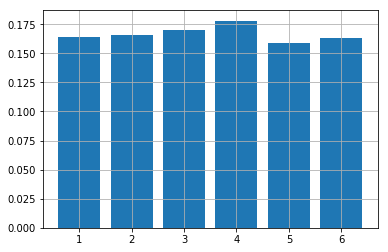

In [5]:
# 一様分布
# サイコロを1000回振ってみる
calc_steps = 1000

# 1〜6のデータの中から、1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

# それぞれの数字がどれくらいの割合で抽出されたか計算
prob_data = np.array([])
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls==i]) / calc_steps)

plt.bar(dice_data, prob_data)
plt.grid(True)

#### ベルヌーイ分布

結果が2種類しかない試行をベルヌーイ試行といいます。ベルヌーイ分布とは、1回のベルヌーイ試行において、各事象が生じる確率の分布を指したものです。
以下では、コインを8回投げて、表が出たら「0」、裏が出たら「1」とし、その結果が、[0, 0, 0, 0, 0, 1, 1, 1]であったと仮定したとき、その確率分布を示したものです。

In [6]:
# ベルヌーイ分布
# 0:head(表)、1:tail(裏)と考える
# サンプル数を8とした
prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])

# uniqueで一意な値を抽出（ここの場合は、0と1）
for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print(i, 'が出る確率', p)
    prob_be_data = np.append(prob_be_data, p)

0 が出る確率 0.625
1 が出る確率 0.375


グラフ化すると以下のようになります。なお、`xticks`でラベルを設定しています。

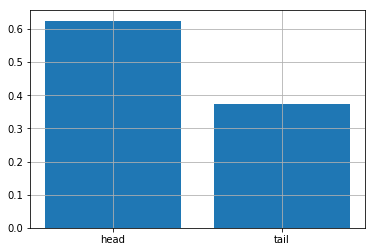

In [7]:
plt.bar([0, 1], prob_be_data, align='center')
plt.xticks([0, 1], ['head', 'tail'])
plt.grid(True)

#### Pythonで分布に基づくデータを取得する

これまで説明してきた一様分布とベルヌーイ分布の例では、実データから、その分布をグラフにする手法をとりました。しかしデータ分析するときには、特定の分布に基づいたデータ列を計算式で作りたいことがあります。たとえば、実データの分布グラフと、計算から求めた分布グラフを比較して、特定の性質に似ているかどうかを確認したり、近似させたりしたい場合などです。
そうしたときには、Numpyの各種関数を使うことで計算できます。以下、それらの関数を使った分布データを作りグラフ化することで、どのような特徴があるのかを見ていきましょう。

#### 二項分布

二項分布は、独立なベルヌーイ試行をn回繰り返したものです。pythonでは、`random.binominal`を使って計算できます。`binominal`に渡すパラメーターは先頭から順に、試行回数（`n`）、確率（`p`）、サンプル数です。`random.binominal`は`n`回の試行のうち、確率`p`で生じる事象が発生する回数を返します。

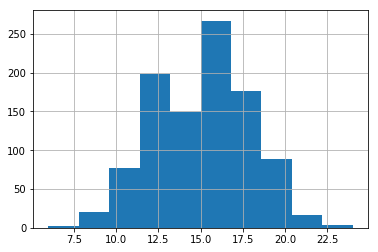

In [8]:
# 二項分布
np.random.seed(0)
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

#### ポアソン分布

ポアソン分布は、稀な事象が起きる確率の時、使われます。一定の時間や面積に対して一定の割合で発生する分布で、たとえば、単位面積当たりの雨粒の数や1平米当たりに生えている木の数などがポアソン分布に従います。

Numpyの`random.poisson`を使って計算できます。1つ目のパラメータは、あの区間で事象が発生すると見込まれる回数で、ここでは7を設定しています。2つ目のパラメータはサンプル数です。

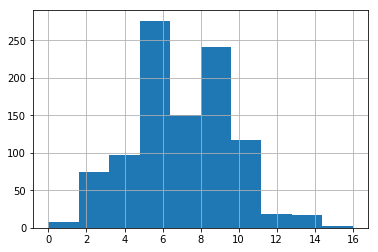

In [9]:
# ポアソン分布
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

#### 正規分布と対数正規分布

次は、正規分布と対数正規分布です。正規分布とはガウス分布ともいわれ、代表的な連続型の確率分布です。私たちが生活する身近するなところでも、色々な現象としてみることができます。対数正規分布は$\log{x}$が正規分布に従うときの分布です。それぞれ、`np.random.normal`、`np.random.lognormal`を使うと得られます。

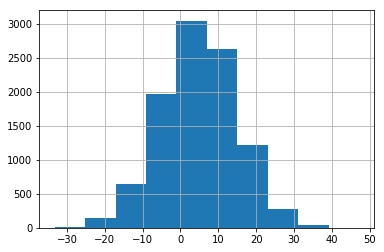

In [10]:
# 正規分布
# np.random.normal(平均、標準偏差、サンプル数)
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

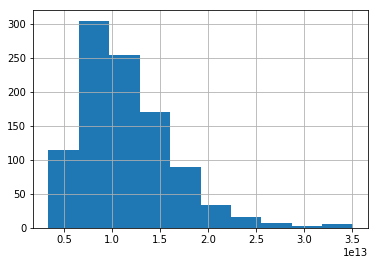

In [11]:
# 対数正規分布
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

### 4.3.3 カーネル密度関数

次にカーネル密度関数について見ていきましょう。これは、与えられたデータを使って、密度関数を推定するものです。
3章で扱った、学生の欠席数データについて、分布の近似をしてみましょう。欠席数は、「`absences`」に記載されているので、このデータを使います。すなわちデータを`student_data_math`として読み込んだとしたら、`student_data_math.absences`が欠席数に相当します。

以下は、カーネル密度関数を使って、欠席数の分布を推定するものです。ただし、データの性質上、0より小さいものはありえないので、実務で使うときは注意しましょう。カーネル密度関数のグラフは、次のように、`kind='kde'`を指定すると描画できます。

`student_data_math.absences.plot(kind='kde', style='k--')`

In [12]:
# 注：ここはデータを取得していれば、実行しなくて大丈夫です。
import requests
import zipfile
from io import StringIO
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

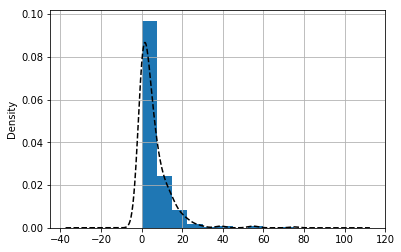

In [13]:
# データを読み込む
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# カーネル密度関数
student_data_math.absences.plot(kind='kde', style='k--')

# 単純なヒストグラム、density=Trueにすることで、確率で表示
student_data_math.absences.hist(density=True)
plt.grid(True)

In [14]:
?plt.hist

上記に今回のstudent-mat.csvの`abcences`がベースになったヒストグラムが描かれています。そして、グラフの点線で絵が描かれている線が、上記で作成したカーネル密度関数で、滑らかに曲線が描かれています。これをみることで、このデータがどんな分布から生成されたのか推測ができます。

#### <練習問題 4-4>

平均0、分散1の正規分布から$n=100$の標本抽出を10000回繰り返して、標本平均$\overline{X}=\frac{1}{n}\sum^n_{i=1}X_i$の標本分布（ヒストグラム）を描いてください。

#### <練習問題 4-5>

<練習問題 4-4>と同じく、対数正規分布の場合を実装してください。

#### <練習問題 4-6>

3章で用いたデータを使い、学生のデータの数学一期目の成績G1のヒストグラムとカーネル密度推定を描いてください。

***

## 4.4 （応用）多次元確率分布
キーワード：同時確率分布、周辺確率関数、条件付き確率関数、条件付き平均、分散共分散行列、多次元正規分布

これまでは、確率変数が1つのみの場合を扱ってきました。次に、確率変数が2つかそれ以上にある場合の確率分布を考えていきましょう。なお、ここは少し応用の範囲になり、難しい場合は、読み流しても後の章に大きな影響はないようにしています。練習問題はありません。

### 4.4.1 同時確率関数と周辺確率関数
$X$が{$x_0, x_1, ...$}、$Y$が{$y_0, y_1, ...$}上で値をとる離散型の確率変数を考えます。$X=x_i$と$Y=y_j$である確率を以下のように書くとします。

\begin{eqnarray}
P(X=x_i, Y=y_j) = p_{X, Y}(x_i, y_j)
\end{eqnarray}

これを**同時確率関数**といい、また、

\begin{eqnarray}
p_{X}(x_i) = \sum^\infty_{j=0}p_{X, Y}(x_i, y_j)
\end{eqnarray}

を$X$の**周辺確率関数**といい、$Y$についても同様に定義されます。

### 4.4.2 条件付き確率関数と条件付き期待値
1変数の時に定義した条件付き確率について、2変数のケースを考えてみましょう。$X=x_i$を与えた時の$Y=y_j$の**条件付き確率関数**を以下のように定義します。

\begin{eqnarray}
p_{Y|X}(y_j|x_i) = P(Y=y_j|X=x_i) =  \frac{p_{X, Y}(x_i, y_j)}{p_X(x_i)}
\end{eqnarray}


また、この条件付き確率関数に関して、期待値をとったものが条件付き期待値であり、$X=x_i$を与えた時の$Y$の**条件付き期待値（条件付き平均）**は

\begin{eqnarray}
E[Y|X=x_i] = \sum^\infty_{j=1}y_jp_{Y|X}(y_j|x_i) = \frac{\sum^\infty_{j=1}y_jp_{X, Y}(x_i, y_j)}{p_X(x_i)}
\end{eqnarray}

のように定義されます。

### 4.4.3 独立の定義と連続分布
2変数における独立の定義は、すべての$x_i$と$y_j$に関して、以下が成り立つ時に、独立であるとします。

\begin{eqnarray}
p_{X, Y}(x_i, y_j) = p_{X}(x_i) p_{Y}(y_j) 
\end{eqnarray}

連続分布についても、同時確率密度関数、周辺確率密度関数、条件付き確率密度関数、独立など定義でき、さらに3つ以上の確率変数の分布についても定義できます。さらに、多変量正規分布やその中で使われる分散共分散行列などもありますが、これらの概念については、参考文献等を使い、勉強してみてください。

#### 2次元の正規分布をグラフで表示する

参考ですが、この多次元の同時確率密度関数をイメージするために、以下で2次元正規分布を表示させてみましょう。

以下は必要なライブラリの読み込みをします。

In [15]:
# 必要なライブラリの読み込み
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [16]:
# データの設定
x, y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2, ))

pos[:, :, 0] = x 
pos[:, :, 1] = y 

上の$x$と$y$のデータは、10から100まで、2つずつ数を作成して、`pos`としてまとめています（次に発生させる多次元の正規分布を可視化するために、xとyで細かくデータを刻んでいるだけで、区切りの数字等には特に意味はありません）。

次は、2次元の正規分布に従うデータを発生させています。`multivariate_normal`には、それぞれの平均と分散共分散行列を設定します。

In [17]:
# 多次元正規分布
# それぞれの変数の平均と分散共分散行列を設定
# 以下の例では、xとyの平均がそれぞれ50と50、[[100, 0], [0, 100]]がxとyの共分散行列になります
rv = multivariate_normal([50, 50], [[100, 0], [0, 100]])

# 確率密度関数
z = rv.pdf(pos)

上記をグラフ化すると以下のようになります。なお、3次元グラフのためAxes3Dの`plot_wireframe`を使っています。

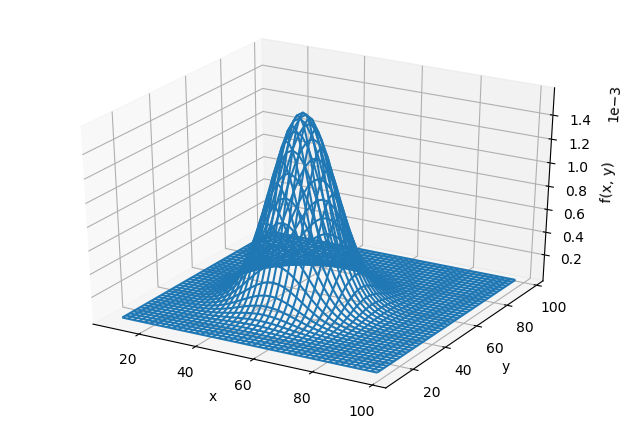

In [18]:
fig = plt.figure(dpi=100)

ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

# x,y,zラベルの設定など
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# z軸の表示目盛り単位を変更、sciが指数表示、axisで軸を指定、scilimits=(n,m)はnからmの外にあるものは指数表記
# scilimits=(0,0)はすべて指数表記にするという意味
ax.ticklabel_format(style='sci', axis='z', scilimits=(0, 0))

***

## 4.5 推計統計学
キーワード：標本、母集団、抽出、推測統計学、標本のサイズ、大数の法則、中心極限定理、t分布、カイ二乗分布、F分布

これまでは、実際に得られたデータについての平均や標準偏差等を求めてきました。この手に入れたデータのことを**標本**といいます。しかし、本来はその背後にあるもっと大きなデータ・全体の性質を知ることが重要です。この標本をベースに統計的な分析を実施して、推測しようとする対象全体を**母集団**といい、これが**推測統計学**です。また、標本は母集団から取り出されたもので、これを**抽出**といいます。実際に、観測されたデータ$x_1, , , x_n$は、$n$個の確率変数$X_1, , , X_n$の実現値であり、このnを標本の**サイズ（大きさ）**といいます。また、母集団の平均（母平均）や分散（母分散）といった、母集団の特性を表す定数のことを**母数**と言います。

![dd](http://www.toukei.metro.tokyo.jp/manabou/img/tyuu/sirou/tokutyou/m-1.jpg)

参照URL：http://www.toukei.metro.tokyo.jp/manabou/img/tyuu/sirou/tokutyou/m-1.jpg

### 4.5.1 大数の法則

次は、確率論で重要な**大数の法則**について学びます。ここで再び先ほどのサイコロを投げて出目を調べる例を考えましょう。

サイコロをどんどん振っていき、それまでの平均値の軌跡をたどります。具体的には、1回目投げた時の目が1の時は平均1、次に投げた時に3が出た場合は、$(1＋3)/2$で平均は2という具合に、続けて平均値を計算していきます。大数の法則とは、この試行を繰り返していく（試行回数Nを大きくする）と、その平均は、期待値（3.5）に近づいていくという法則です。

以下では、サイコロを投げる回数$N$を1000とし、それを4回実施します（4パス）。以下の結果グラフは、どのパスも$N$が大きくなればなるほど、3.5に近づいてるのがわかります。

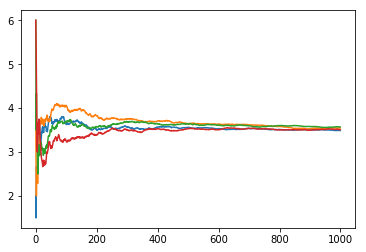

In [19]:
# 大数の法則

# 計算回数
calc_times =1000
# サイコロ
sample_array = np.array([1, 2, 3, 4, 5, 6])
number_cnt = np.arange(1, calc_times + 1)

# 4つのパスを生成
for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p / number_cnt)

### 4.5.2 中心極限定理

次は、中心極限定理です。こちらは、サイコロを投げる回数$N$が増えれば増えるほど、標本平均が正規分布の形になっていく法則です。

In [20]:
# 中心極限定理
def function_central_theory(N):
    
    sample_array = np.array([1, 2, 3, 4, 5, 6])
    numaber_cnt = np.arange(1, N + 1) * 1.0
 
    mean_array = np.array([])
 
    for i in range(1000):   
        cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1] / N)
 
    plt.hist(mean_array)

それではこの関数を使って、$N$をどんどん増やし、そのヒストグラフを見てみましょう。

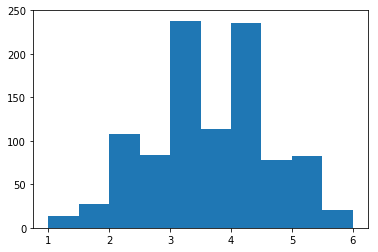

In [21]:
# N=3
function_central_theory(3)

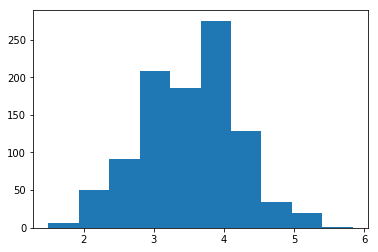

In [22]:
# N=6
function_central_theory(6)

$N$をどんどん増やしていくと、正規分布の形になっているのがわかります。

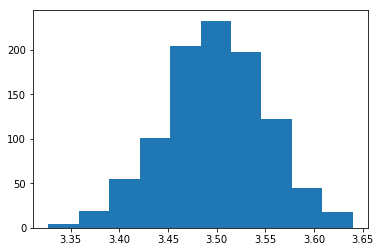

In [23]:
# N= 10^3
function_central_theory(10**3)

### 4.5.3 標本分布

次に、代表的な標本分布について学びましょう。

##### カイ2乗分布

1つ目は**カイ2乗分布**です。$m$個の確率変数$Z_1, ...Z_m$が互いに独立に分布し、各$Z_i$が標準正規分布（平均0，分散1の正規分布）
に従うとします。この時、以下の確率変数の二乗和である

\begin{eqnarray}
W = \sum^m_{i=1}Z^{2}_{i}
\end{eqnarray}

は、自由度mのカイ2乗分布に従うと言います。以下が、その分布に従う乱数のヒストグラムです。なお、zipは1章で紹介した関数ですが、複数の配列から、タプルの配列を作るために使います。ここでは[2, 10, 60]という配列と["b", "g", "r"]という配列から、[(2, "b"), (10, "g"), (60, "r")]というタプルの配列を作ります。

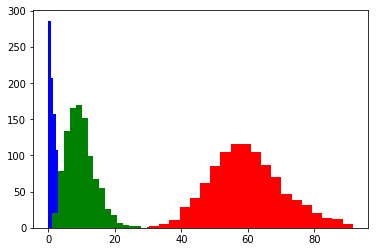

In [24]:
# カイ2乗分布
# 自由度2, 10, 60に従うカイ二乗分布が生成する乱数のヒストグラム
for df, c in zip([2, 10, 60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)

#### ステューデントt分布
次は、ステューデントの**t分布**です。$Z$と$W$を独立な確率変数として、それぞれ標準正規分布、自由度mのカイ2乗分布に従うとした時、

\begin{eqnarray}
T = \frac{Z}{\sqrt{\frac{W}{m}}}
\end{eqnarray}

とおいた時、$T$は自由度$m$のステューデントのt分布に従うといいます。以下はt分布のサンプル図です。

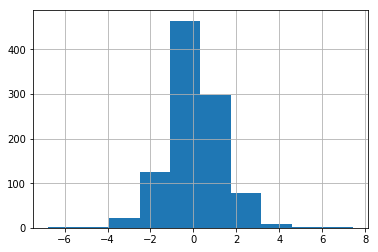

In [25]:
# t分布
x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

#### F分布
最後に、**F分布**についても紹介します。$W_1$と$W_2$を独立な確率変数、それぞれ自由度$m_1, m_2$のカイ2乗分布に従うとして、

\begin{eqnarray}
F = \frac{\frac{W_1}{m_2}}{\frac{W_2}{m_2}}
\end{eqnarray}

とおいた時、$F$は自由度$(m_1, m_2)$のスネディッカーのF分布に従うといいます。以下は、F分布のサンプル図です。

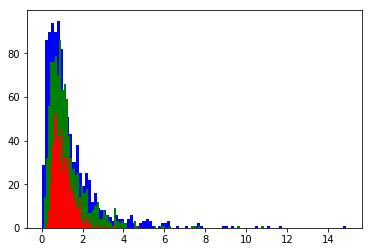

In [26]:
# F 分布
for df, c in zip([ (6, 7), (10, 10), (20, 25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)

以上で代表的な分布についての紹介は終わります。他にも、いろいろな分布がありますので、必要が生じた場合にその都度調べてみましょう。

#### <練習問題 4-7>

自由度5、25、50のカイ二乗分布からの乱数をそれぞれ1000個発生させて、ヒストグラムを書いてください。

#### <練習問題 4-8>

自由度100のt分布からの乱数を1000個発生させて、ヒストグラムを書いてください。

#### <練習問題 4-9>

自由度(10, 30)、(20, 25)のF分布からの乱数をそれぞれ1000個発生させて、ヒストグラムを書いてください。

***

## 4.6 統計的推定

キーワード：推定量、点推定、不偏性、不偏推定量、一致性、区間推定、信頼区間、信頼係数、最尤法、尤度、尤度関数、ベイズ法

ここでは**推定**について学んでいきます。

### 4.6.1 推定量と点推定
母集団の確率分布、平均、分散の推測をする時、母集団から標本を抽出し、標本の平均や分散を使って推定します。ここで、大きさnの無作為標本{$X_1, ..., X_n$}をもとに、母平均$\mu$を求める（推定する）方法を考えるとします。まず、標本平均$\overline{X}$は、

\begin{eqnarray}
\overline{X}=\frac{1}{n}\sum^n_{i=1}X_i
\end{eqnarray}

となります。これを一般化すると、以下のように確率変数の関数として記述でき、この式を**推定量**と言います。これは母平均や母分散などの母数を推定するための式です。標本に基づいて、母数を1点のパラメータ値（$\theta$）として言い当てることを**点推定**といいます。

\begin{eqnarray}
\overline{X}=T(X_1, ..., X_n)
\end{eqnarray}

### 4.6.2 不偏性と一致性

ただし、関数としてなんでも良いというわけではなく、パラメータをより正確に推定できることが望ましいです。そのための判断基準として、**不偏性**と**一致性**という性質があります。

推定量の期待値が母数$\theta$と一致するとき、推定量に**不偏性**があるといい、以下のように表現できます。この不偏性を持つ推定量を**不偏推定量**といいます。

\begin{eqnarray}
E[T(X_1, ..., X_n)]=\theta
\end{eqnarray}

一致性とは、$\theta$の推定量$E[T(X_1, ..., X_n)]$が観測個数nが大きくなるにつれて、$\theta$に近づいていくという性質であり、任意の$\epsilon>0$に関して、以下のように表現できます。このとき、$T(X_1, ..., X_n)$を一致推定量といいます。

\begin{eqnarray}
\displaystyle \lim_{n \to \infty} P[|T(X_1, ..., X_n)- \theta |\ge \epsilon]=0
\end{eqnarray}

### 4.6.3 区間推定

点推定では母数を1点で求めましたが、区間推定はある程度の区間を持たせて、母数を推定するものです。まず、標本$X_1, ..., X_n$があり、これは平均が$\mu$、分散が1の正規分布$N$($\mu$,1)から無作為抽出されているとします。この標本から母平均$\mu$を推定する場合を考えてみましょう。この場合、標本平均$\overline{X}$は、平均が$\mu$、分散が$\frac{1}{n}$の正規分布$N(\mu,\frac{1}{n})$に従うため、正規分布の両側$\alpha$点を$z_{\alpha /2}$として、

\begin{eqnarray}
P(-z_{\alpha /2} \le \sqrt{\mathstrut n} (\overline{X} - \mu ) \le z_{\alpha /2} )=1-\alpha
\end{eqnarray}

が成り立ちます。この式を書き換えると、

\begin{eqnarray}
P(\overline{X} - \frac{z_{\alpha /2}}{\sqrt{n}} \le \mu \le \overline{X} + \frac{z_{\alpha /2}}{\sqrt{n}})=1-\alpha
\end{eqnarray}

と書くことができ、区間$[\overline{X} - \frac{z_{\alpha /2}}{\sqrt{n}} , \overline{X} + \frac{z_{\alpha /2}}{\sqrt{n}}]$ を$\mu$の推定のための区間として用いることができます。このとき、区間$[\overline{X} - \frac{z_{\alpha /2}}{\sqrt{n}} , \overline{X} + \frac{z_{\alpha /2}}{\sqrt{n}}]$を**信頼区間**と言います。信頼区間に推定したい母数（ここでは母平均）が入っている確率を**信頼係数**といい、$1-\alpha$で表現できます。信頼区間の一般的な定義は以下のようになります。

$X_1, ..., X_n$を母集団分布$f(x;\theta)$からの無作為標本として、$\theta$は1次元の母数とします。${\bf X}=(X_1, ..., X_n)$とおくと、2つの統計量$L({\bf X}), U({\bf X})$がすべての$\theta$について以下を満たす時、区間$[L({\bf X}), U({\bf X})]$を**信頼係数**$1-\alpha$の**信頼区間**といいます。

\begin{eqnarray}
P(L({\bf X})\le \theta \le U({\bf X})) \ge 1-\alpha
\end{eqnarray}

### 4.6.4 推定量を求める

推定量を求めるにはいつかの手法があります。ここでは、最尤法とベイズ法について、簡単に解説します（他にモーメント法などもあるので、調べてみてください）。少し応用的な内容になりますので、読み流しても大丈夫です。

#### 最尤法

同時確率関数を学んだ時に、母数を与えられて、観測値が生じる確率を求めましたが、逆に、観測値を与えられた時に、確率関数を母数の関数とみなしたものが**尤度関数**です。最尤法は、尤度関数を最大化する母数を母数の推定値とする方法です。

今、確率関数$f(x;\theta)$を与えられているとします。$x$は変数、$\theta$は定数を意味しています。

母集団からの無作為標本$X_1, ..., X_n$をとり、${\bf X}=(X_1, ..., X_n)$とします。この${\bf X}$の実現値${\bf x}=(x_1, ..., x_n)$における同時確率関数を$\theta$の関数とみなして、以下のように尤度関数を定義します。

\begin{eqnarray}
L(\theta;{\bf x})=f(x_1;\theta) \cdot...\cdot f(x_n;\theta)
\end{eqnarray}

尤度関数は、積の形をしており、対数変換によって和に直した方が計算しやすいため、以下のように**対数尤度関数**に直します。

\begin{eqnarray}
\log L(\theta;{\bf x})=\sum^n_{i=1} \log f(x_i;\theta)
\end{eqnarray}

上記の最大値を求めるために、微分して0になる解$\theta$を求めます。以下の方程式を**尤度方程式**、この解$\theta$を**最尤推定量**といいます。これが最尤推定法による推定値の求め方です。

\begin{eqnarray}
\frac{d}{d\theta}{\log L(\theta,{\bf x})}= 0
\end{eqnarray}

#### ベイズ法

今までは、母数$\theta$に対して何も情報がなく、頻度論的なアプローチで推定をしていましたが、この$\theta$について、事前分布を仮定して、ベイズの定理を使い、事後分布に更新していくことをベイズ法といいます。

ここで、標本から得られる尤度関数を$p(x|\theta)$として、母数$\theta$が事前確率$\pi(\theta)$に従うと仮定すると、ベイズの定理により、事後分布を以下のように求めることができます。

\begin{eqnarray}
\pi(\theta|x) = \frac{p(x|\theta)\pi(\theta)}{\int p(x|\theta)\pi(\theta) d\theta}
\end{eqnarray}

#### <練習問題 4-10>
平均$\mu$で分散$\sigma^2$の正規母集団から大きさnの標本から作った標本平均は、母平均であることが望ましく、この不偏性を示してください（手計算で大丈夫です）。

#### <練習問題 4-11>
あるコインを5回投げたとして、裏、表、裏、表、表と出ました。このコインの表が出る確率を$\theta$として、これを推定してください（手計算で大丈夫です）。

#### <練習問題 4-12>
母集団が以下の指数分布に従っている時に、そこから大きさnの標本${X_1, X_2, ...X_n}$を得たとして、母数${\lambda}$を最尤推定してください（手計算で大丈夫です）。

\begin{eqnarray}
f(x|\lambda) = \lambda \mathrm{e}^{-\lambda x}
\end{eqnarray}

***

## 4.7 統計的検定
キーワード：帰無仮説、対立仮説、有意、棄却、有意水準、第1種の過誤、第2種の過誤、検出力

さて、長く数式の説明が続いたので、ここで再び、3章で扱った「学生のデータ」に戻りましょう。練習問題でもやりましたが、まずは、数学とポルトガル語の成績の平均を計算してみます。次のようになります。

ここではstudent-mat.csvという数学成績データとstudent-por.csvというポルトガル語成績データを読み込み、それをマージしています。pandas.merge（以下ではpd.merge）のパラメータ「`on`」で指定しているのはマージする項目、「`suffixes`」はマージ後の列の末尾に付ける接辞尾です。

In [27]:
# 数学のデータを読み込む
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# ポルトガルのデータを読み込む
student_data_por = pd.read_csv('student-por.csv', sep=';')

# マージする
student_data_merge = pd.merge(student_data_math
                              , student_data_por
                              , on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu'
                                      , 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
                              , suffixes=('_math', '_por'))

print('G1数学の成績平均：', student_data_merge.G1_math.mean())
print('G1ポルトガル語の成績平均：', student_data_merge.G1_por.mean())

G1数学の成績平均： 10.861256544502618
G1ポルトガル語の成績平均： 12.112565445026178


### 4.7.1 検定
数字を見ていると、若干ではありますが、数学の方が悪いように見えます。しかし、果たしてこれは本当に差があると言ってもよいのでしょうか？　これを考えていくのが検定というアプローチです。仮説として、母集団において成績の平均に差がないとしましょう。数学の成績の母平均を$\mu_{math}$、ポルトガル語の成績の母平均を$\mu_{por}$とすると、以下の式が成り立つとします。

\begin{eqnarray}
\mu_{math} = \mu_{por}
\end{eqnarray}

検定において、正しいか検討する仮説のことを**帰無仮説**といい、$H_{0}$とします。一方、帰無仮説の否定は、2つの間に差があるという仮説です。つまり、以下の式が成り立つことを意味します。

\begin{eqnarray}
\mu_{math} \neq \mu_{por}
\end{eqnarray}

これを**対立仮説**といい、$H_{1}$と表します。次に、先ほどの$H_{0}$を正しいとした場合に、統計的なアプローチを取り、それが起こることはありえない（たとえば、$\mu_{math} = \mu_{por}$が起こる確率が5%未満になる）ということが言えたとします。この時、この$H_{0}$は**棄却**されるといい、対立仮説が採択され、よって差があることがいえることになります。


また、先ほど5%未満としましたが、検定において帰無仮説を棄却する水準のことを**有意水準**といい、それを5%に設定したことになります。また、有意水準に満たないことを、統計的な差がある（**有意**である）といいます。有意水準は**α**で表され、α=5%やα=1%がよく使われます。

また、**p-value**（**p値**）とは、偶然、実際に反した数値が統計量として計算されてしまう確率です。$H_{0}$が正しい場合に、p値が低いほど、ありえないことが起きた（$H_{0}$が正しくないという統計量が計算された）ということになります。

それでは、これらの概念を使って、p値を計算してみましょう。 p値を計算するには、`stats.ttest_rel`を使います。

In [28]:
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print( 'p値 = ', p)

p値 =  1.6536555217100788e-16


有意水準を1%で設定すると、帰無仮説が棄却され、差があると結論づけることができます。

### 4.7.2 第1種の過誤と第2種の過誤

ここでは、有意水準1%だと帰無仮説が棄却されましたが、もしかすると帰無仮説が正しかったということもありえます。このように、帰無仮説が正しいにもかかわらず、棄却してしまうことを**第1種の過誤**といい、その確率は通常**$α$**で表します。別名、あわてものの誤りとも言われます。一方、この帰無仮説が誤っているにもかかわらず受容してしまうことを、**第2種の過誤**といい、その確率を**$β$**で表します。この第2種の過誤は誤っているのに見過ごしているので、ぼんやりものの誤りともいわれます。

この$β$の補数$1-β$は**検出力**と呼ばれ、帰無仮説が誤っているときに正しく棄却できる確率を表します。裁判で例えると、実際には有罪である犯罪者が無罪の判決を受けるのは第1種の過誤、実際には無罪の人が有罪の判決を受けるのは第2種の過誤に該当します。以下の図が参考になります。

![error](https://user-images.githubusercontent.com/423158/38920393-22e1e66e-432e-11e8-9bc2-4356f60b9732.png)

一般的に$1-β$は0.8程度ほしいといわれています。しかし、$α$と$β$は片方を小さくすると、もう片方は大きくなる関係にあります。また、$β$は重要な量ですが、値を計算するにはサンプルサイズや効果量が必要になるため、ここでは概念の紹介に留めておきます。


### 4.7.3 ビッグデータに対する検定の注意
さまざまな分野で使用されている検定ですが、注意点があります。実は検定はビッグデータの解析（特に決まった厳密な定義はありませんが、サンプルサイズが数百万、数千万以上ある場合を想定しています）には向いていないのです。まず第一に、標本と母集団の統計量が互いに厳密に等しいことは、実世界ではほぼあり得ません。

サンプルサイズを大きくすると、それにともなって検出力$1-β$が大きくなり、実務的には等しいと考えていいような微妙な差であってもp値が小さくなり、帰無仮説が棄却されてしまいます。つまり、ビッグデータに対して検定を行うと大抵の場合、高度に有意な（p値がかなり小さい）結果になってしまうのです。

また、検定で高度に有意な結果になったとしても、2つの母数は大きく異なるという事は結論付けられません。2つの値がどの程度異なるかに関しては検定からはわからないのです。どの程度の差があるかを知りたい場合には前節で用いた信頼区間を用いるのが効果的です。

以上で、検定までの単元は終了です。この単元は幅が広く、この講座では扱いきれない部分がありますが、もし今までに統計や確率について学ぶ機会がなかった場合は、はじめに紹介した参考文献等を見ながらぜひ一通り勉強してみてください。また、今まで扱ったライブラリの関数には色々なオプションがありますので、興味のある方は調べてみてください。

#### <練習問題 4-13>

3章で使用したデータで、数学とポルトガル語の成績のG2のそれぞれの平均について、差があると言えるでしょうか。また、`G3`はどうでしょうか。

***

## 4.8 総合問題

### ■総合問題4-1 検定

「4.7 統計的検定」で使用したデータ（`student_data_merge`）を使って、以下の問いに答えてください。

（1）それぞれの欠席数（`absences`）については、差があるといえるでしょうか。


（2）それぞれの勉強時間（`studytime`）についてはどうでしょうか。